In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heat-index/global_heat_index.csv
/kaggle/input/solar-prediction/SolarPrediction.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/kaggle/input/heat-index/global_heat_index.csv")
df

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
...,...,...,...,...,...,...,...,...,...,...,...
17515,2012,12,31,19,-6,14.702595,984.779114,22.647353,54.538628,3.383211,0
17516,2012,12,31,20,-6,13.823766,985.189148,23.993252,61.517830,3.519155,0
17517,2012,12,31,21,-6,12.951590,984.829224,25.759637,65.096191,3.518434,0
17518,2012,12,31,22,-5,12.138259,984.735046,27.901296,66.668427,3.400819,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


Data Cleaning

In [4]:
clean1=df[df['Hour']<6]
clean2=df[df['Hour']>18]

print("Cleaning data from 12am to 5:59 am")

clean1.head()

Cleaning data from 12am to 5:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [5]:
print("Cleaning data from 6pm to 11:59 pm")

clean2.head()

Cleaning data from 6pm to 11:59 pm


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0


In [7]:
df=df[~(df['Hour'] < 6) & ~(df['Hour'] > 18)]
df

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
...,...,...,...,...,...,...,...,...,...,...,...
17510,2012,12,31,14,-8,24.219059,983.661621,10.363324,5.771851,1.837763,553
17511,2012,12,31,15,-9,22.715263,983.482239,11.240004,8.507614,1.937734,408
17512,2012,12,31,16,-7,19.968041,983.660339,14.983540,17.507896,2.191131,221
17513,2012,12,31,17,-5,16.706517,983.768677,21.564891,29.407814,2.675606,16


Input and Output data

In [9]:
x=df.iloc[:,0:10]
y=df.iloc[:,-1]

In [10]:
from sklearn.preprocessing import MinMaxScaler

x=pd.DataFrame(MinMaxScaler().fit(x).transform(x))



In [11]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046


Correlation Matrix with Heatmap

In [12]:
corr_matrix=df.corr()

In [13]:
corr_matrix

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,-1.206348e-12,-7.235267e-14,-1.408221e-15,-0.139773,0.026887,0.020252,-0.166373,0.011996,0.037455,-0.013891
Month,-1.206348e-12,1.000000e+00,1.189318e-02,2.332832e-15,0.491577,-0.038576,-0.036657,0.460993,-0.102648,-0.216902,-0.090227
Day,-7.235267e-14,1.189318e-02,1.000000e+00,2.843627e-17,-0.017772,-0.011873,0.046708,-0.005074,-0.021712,0.038542,0.011420
Hour,-1.408221e-15,2.332832e-15,2.843627e-17,1.000000e+00,-0.020686,0.269499,-0.183460,-0.211869,0.113641,0.006593,0.040573
Dew Point,-1.397731e-01,4.915774e-01,-1.777210e-02,-2.068626e-02,1.000000,0.198330,-0.587488,0.790023,0.160133,0.072254,-0.024650
Temperature,2.688710e-02,-3.857553e-02,-1.187262e-02,2.694991e-01,0.198330,1.000000,-0.627170,-0.344609,0.431627,0.263510,0.608713
Pressure,2.025241e-02,-3.665724e-02,4.670753e-02,-1.834597e-01,-0.587488,-0.627170,1.000000,-0.244693,-0.428785,-0.435057,-0.144057
Relative Humidity,-1.663735e-01,4.609927e-01,-5.073932e-03,-2.118687e-01,0.790023,-0.344609,-0.244693,1.000000,-0.053618,-0.107921,-0.371410
Wind Direction,1.199631e-02,-1.026477e-01,-2.171216e-02,1.136411e-01,0.160133,0.431627,-0.428785,-0.053618,1.000000,0.207285,0.168475
Wind Speed,3.745498e-02,-2.169017e-01,3.854214e-02,6.593433e-03,0.072254,0.263510,-0.435057,-0.107921,0.207285,1.000000,0.007935


<Axes: >

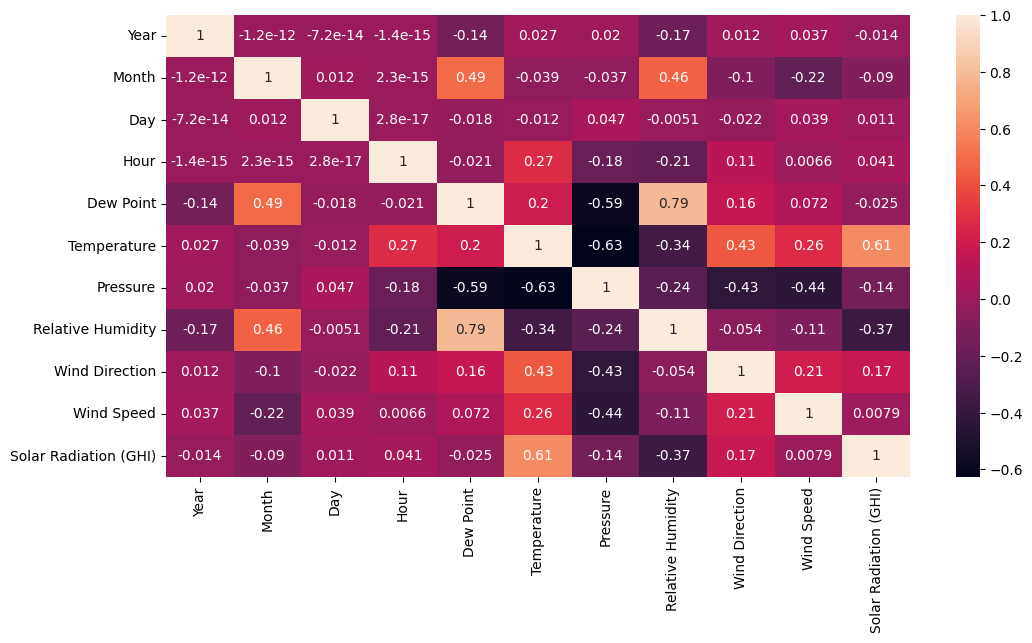

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)